In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [28]:
alpha = 4e-7
beta = 0
tmax = 42
t_span = [0,tmax]
s0 = [4e4]
delta = 0
gamma = [0, 500, 1000]

In [30]:
def tao(s,i):
    new_missions = delta/s + gamma[i]
    return new_missions
def ds_dt(t, s):
    ds = alpha * s**2 + beta * s + tao(s,i)
    return [ds]

In [32]:
solution = []
for i in range(3):
    sol = solve_ivp(ds_dt, t_span, s0, method='RK45', t_eval=np.linspace(0, tmax, 2000))
    solution.append(sol) 

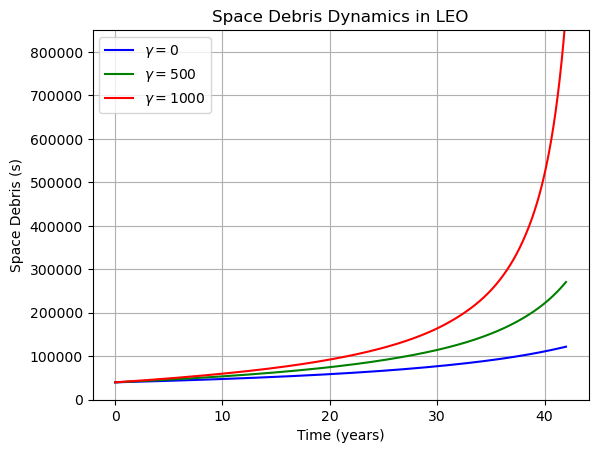

In [36]:

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
name = [r'$\gamma = 0$', r'$\gamma = 500$', r'$\gamma = 1000$']
for i in range(3):  
    plt.plot(solution[i].t, solution[i].y[0], color=colors[i % len(colors)], label=name[i])

plt.ylim(0, 8.5e5)
plt.xlabel("Time (years)")
plt.ylabel("Space Debris (s)")
plt.title("Space Debris Dynamics in LEO")
plt.grid()
plt.legend()


plt.show()